# Classification

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import copy

## Copy object in python:

### Shallow copy:

In [2]:
X = [1,2]
Y = X.copy()
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [3]:
X = [[1,2]]
Y = X.copy()
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[0, 2]]  Y:  [[0, 2]]  X==Y:  True


### Deep copy

In [4]:
X = [1,2]
Y = copy.deepcopy(X)
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [5]:
X = [[1,2]]
Y = copy.deepcopy(X)
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[1, 2]]  Y:  [[0, 2]]  X==Y:  False


# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [6]:
data = [
[1, 0, 1, 1],
[0, 1, 0, 0],
[0, 1, 1, 1],
[1, 0, 1, 0],
[1, 0, 0, 1],
[0, 0, 1, 1],
[1, 1, 1, 1],
[1, 0, 0, 1],
[0, 1, 0, 1],
[0, 0, 0, 1],
]

1.2) Each object is assigned to a class "0" or "1". The assignements are as follows (cl):

In [7]:
cl = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

**1.3) When do you think an object is assigned to class "1"?**

In [9]:
#An object is more likely to be in class 1 when its fourth attribute is 1, especially when it has a third attribute of 1.
#A fourth attribute of 0 strongly influences class 0.

1.4) Build a naive Bayes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are propabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case when $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$. Do not forget to normalize the ''probabilities'' (divide by sum). <br>
(Advanced*) Add support for non-binary attribute values.

In [8]:
def getNaiveBayesProbabilities(obj, data, cl):
    p0 = 1.0
    p1 = 1.0

    total = len(cl)
    count0 = cl.count(0)
    count1 = cl.count(1)
    
    p0 *= count0 / total
    p1 *= count1 / total

    for i in range(len(obj)):
        match0 = 0
        total0 = 0
        for j in range(len(data)):
            if cl[j] == 0:
                total0 += 1
                if data[j][i] == obj[i]:
                    match0 += 1
        prob0 = match0 / total0 if match0 > 0 else 0.01
        p0 *= prob0

        match1 = 0
        total1 = 0
        for j in range(len(data)):
            if cl[j] == 1:
                total1 += 1
                if data[j][i] == obj[i]:
                    match1 += 1
        prob1 = match1 / total1 if match1 > 0 else 0.01
        p1 *= prob1
        
    total_p = p0 + p1
    return [p0 / total_p, p1 / total_p]




In [17]:
print(getNaiveBayesProbabilities([0,0,0,0], data, cl))
print(getNaiveBayesProbabilities([0,1,0,1], data, cl))


[0.995334370139969, 0.004665629860031103]
[0.34782608695652184, 0.6521739130434783]


1.6) Find objects which give a maximum probability for class "0" and "1".

In [ ]:
best0 = None
best1 = None
max0 = -1
max1 = -1

for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            for d in [0,1]:
                obj = [a,b,c,d]
                p = getNaiveBayesProbabilities(obj, data, cl)
                if p[0] > max0:
                    max0 = p[0]
                    best0 = obj
                if p[1] > max1:
                    max1 = p[1]
                    best1 = obj

print("Best for class 0:", best0, "with probability", round(max0, 3))
print("Best for class 1:", best1, "with probability", round(max1, 3))


Best for class 0: [1, 0, 0, 0] with probability 0.998
Best for class 1: [0, 1, 1, 1] with probability 0.968


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)):

In [19]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- DATA: data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- CLASSIFIED : classified objects, [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- NOT_CLASSIFIED: list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent objects that are to be classified.

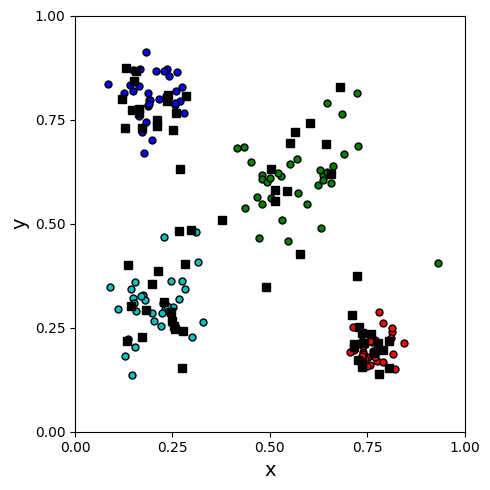

In [22]:
DATA = cm.getTestDataSet()
CLASSIFIED = cm.getTestClassified()
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN

2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  <br>
(Advanced*) Add support to "weighted" variant of k-NN

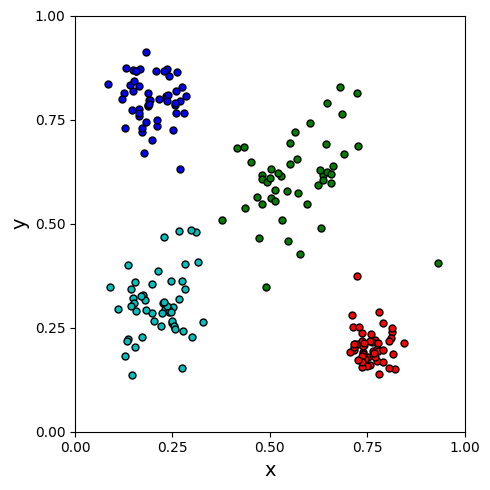

In [ ]:
def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    ### COPY INPUT CLASSIFIED OBJECTS
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE THE CL, i.e., ADD RESPECTIVE INDICES
    CL = copy.deepcopy(CLASSIFIED)
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    UPDATE = []
    for IDX in NOT_CLASSIFIED:
        obj = DATA[IDX]
        neighbors = []
    # TODO
        for class_index in range(len(CLASSIFIED)):
            for other_idx in CLASSIFIED[class_index]:
                other_obj = DATA[other_idx]
                dist = cm.getEuclideanDistance(obj, other_obj)
                neighbors.append((dist, class_index))  

        neighbors.sort()
        nearest = neighbors[:K]
        
        counts = [0] * len(CLASSIFIED)
        for dist, cls in nearest:
            counts[cls] += 1

        best_class = counts.index(max(counts))
        CL[best_class].append(IDX)

    ################
    return CL
#DISPLAY CLASSIFIED DATA
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. **Which class do you think is the most difficult/easiest to describe/characterize?**

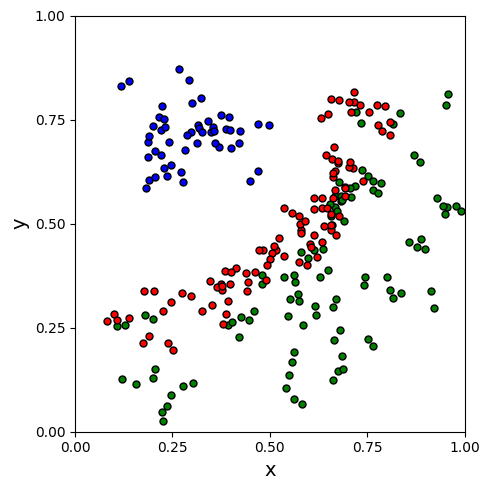

In [9]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [ ]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignements for the first 75% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remianing "not classified" object indices. Run the code below and observe that 25% of some uniformly distributed data points are not classified.

In [ ]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for i in range(LIM):
    if idxs[i] < 50: CLASSIFIED_TRAIN[0].append(idxs[i])
    elif idxs[i] < 150: CLASSIFIED_TRAIN[1].append(idxs[i])
    else: CLASSIFIED_TRAIN[2].append(idxs[i])
for i in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[i])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

**Which class got the best/the worst recall. Why?**<br>
**What is the best K. Are there any significant differences?**<br>
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment.

In [ ]:
### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

for K in [1,3,5,7]:
    CL = doKNN(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)
    print(K)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]

    #TODO

    ### PRINT STATS
    print(CORRECTLY)
    print(INCORRECTLY)
    print(RECALL)
    ### DISPLAY
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)